### Дипломная работа
# Здравохранение в республиках бывшего Советского Союза на 2020 год

### Оглавление:
* [Вступление](#1)
* [Импорт библиотек](#2)
* [Функция для получения и подготовки данных к работе](#3)
* [Сравнение и анализ данных](#4)
    * [Средняя продолжительность жизни](#5)
    * [Кол-во докторов, которое приходится](#6)
    * [Кол-во медсестринского и акушерского персонала](#7)
    * [Уровень обеспечения всеобщего охвата услугами здравоохранения](#8)
    * [Процент населения обеспеченный питьевой водой](#9)
    * [Процент населения обеспеченный чистыми видам топлива и технологиям](#10)
    * [Процент населения имеющий доступ к базовым санитарным услугам](#11)
    * [Уровень смертности от загрязнений атмосферного и домашнего воздуха](#12)
    * [Распространение потребление табака](#13)
    * [Потребление алкоголя](#14)
    * [Уровень смертности в ДТП](#15)
    * [Коэффициент подростковой рождаемости](#16)
    * [Детская смертность в первые 28 дней жизни](#17)
    * [Смертность в возрасте от 30 до 70 лет от заболеваний](#18)
    * [Кол-во заболеваний туберкулезом](#19)
    * [Уровень самоубийств](#20)
* [Визуализация матрицы корреляции](#21)
* [Статистический тест с помощью критерия Манна-Уитни](#22)
* [Выводы](#23)

### Вступление<a id="1"></a>
В первые десятилетия советской власти была создана централизованная система здравоохранения Семашко. С помощью этой системы получилось добиться огромных успехов в области охраны здоровья населения бывшего Советского Союза, который стал в некоторых отношениях одной из первых стран, достигших чего-то близкого к обеспечению всеобщего охвата основными услугами здравоохранения. Эта система работала относительно хорошо до 1970-х годов, когда стали доступны новые медицинские технологии и люди начали требовать улучшения качества предоставляемой помощи. В 1970-е годы страна перешла от модели Семашко к модели, в которой основное внимание уделялось специализированной амбулаторной помощи. Роль участкового врача значительно уменьшилась. 
(<a href="https://www.who.int/bulletin/volumes/91/5/13-030513/ru/" target="_blank">Тернистый путь от системы Семашко к новой модели здравоохранения</a>)

После распада СССР ситуация с медицинским обслуживанием в большинстве стран Восточной Европы была просто катастрофической. Во многих сателлитах бывшего соцлагеря она продолжает оставаться таковой до сих пор. Эксперты  Всемирной организации здравоохранения (далее ВОЗ) утверждают, что после 1991 года в силу разности экономических потенциалов страны Восточной Европы и, в частности, бывшего Советского Союза, столкнулись с разного уровня проблемами. 
«Да, все страны пережили очень резкое сокращение промышленного производства и государственных доходов, что повлияло на финансирование систем здравоохранения. Однако медработники в странах, где не было природных ресурсов, и которые после распада СССР были вынуждены покупать энергоносители по очень высоким ценам, пострадали больше всего. Например, к 2000 году в Молдове и Кыргызстане 25% бюджета, предназначенного для здравоохранения, пошло на закупку энергоносителей, чтобы отопить дома в зимний сезон», – отметил глава европейского отделения ВОЗ.
(<a href="https://www.golosameriki.com/a/ussr_healthcare_2010_05_26-94974414/185245.html" target="_blank">Проблемы здравоохранения в бывшем СССР</a>)

Так как система здравоохранения в СССР была централизованной и единой для всей страны, то предположим, что во всех республиках уровень медицины был одинаковый. Давайте рассмотрим, как изменилась ситуация в странах бывшего СССР к 2020 году. Будем оперировать с различными выборками данных с 2000 по 2019 год.

Для нашей работы мы будем использовать датасет <a href="https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete" target="_blank">World Health Statistics 2020</a>
<a id="2"></a>

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
pd.options.mode.chained_assignment = None

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# Список республик бывшего СССР
resp = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',\
        'Republic of Moldova', 'Russian Federation', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

datas = {} # В этот словарь будем собирать данные по странам

Подготовим функцию для загрузки и подготовки данных к работе. В связи с тем, что в таблицах присутствуют данные с разным порядком столбцов, иногда разбитые на дополнительные части (пол, тип заболевания и т.п.), то в эту формулу будем дополнительно передавать информацию, какие именно данные из таблицы нам нужны.
<a id="3"></a>

In [2]:
# Функция для стандартного выбора данных из таблиц

f = lambda x : (x.replace('<', '').replace('No data', '0').split(" ")[0]) # Если в строке есть 2 вида данных указанный 
                                                                          # через пробел, то берем только 1

# Передаем в нее название файла, имена столбцов, название нужной нам переменной, период и условие
def get_stat(filename, nms, conditions={}, asc=True):
    url = "./dataframes/" + filename + ".csv"
    data = pd.read_csv(url, dtype = {'country': str, 'period': int},\
                       converters = {'result':f},\
                       header=None, skiprows=[0,], names=nms)
    
    data = data[(data['country'].isin(resp))] # Выбираем нужные нам страны и период
    
    data['result'] = data['result'].astype('float') # Устанавливаем для данных тип float
    
    for k, v in conditions.items(): # Перебираем дополнительные условия выборки
        data = data[(data[k]==v)]
        
    # Получаем среднее значение для каждой страны за все года        
    res = data[['country', 'result']].groupby(['country']).mean()
    
    return res.sort_values(by='result', ascending=asc).reset_index()

<a id="4"></a>
<a id="5"></a>
Для начала узнаем среднюю продолжительность жизни в каждой стране. В представленном у нас датасете присутствуют данные о продолжительности жизни за 2000, 2010, 2015 и 2019 года. Мы будем брать средние данные, как в данном случае, так и в случае последующих датасетов. Это связано с тем, что в разных датасетах присутствуют данные за разные периоды и у нас просто не будет возможности сравнивать совпадающие по годам данные. Поэтому мы будем брать среднее значение для определенного датасета по каждой стране.

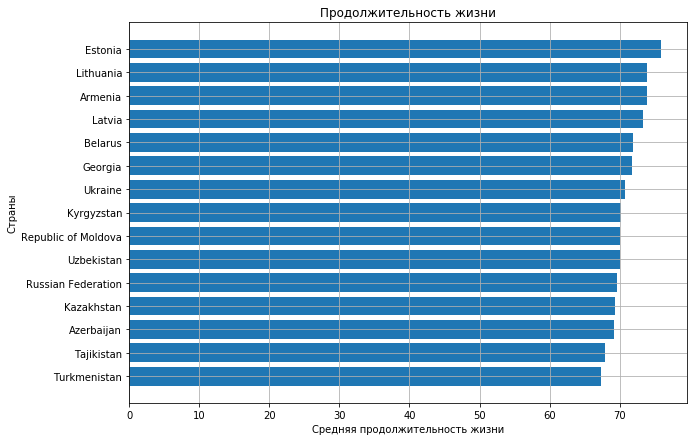

In [3]:
datas['leab'] = get_stat('lifeExpectancyAtBirth',
                     ['country','period','indicator','gender','result'],
                     {'gender':'Both sexes'})

plt.barh(datas['leab']['country'], datas['leab']['result'])
plt.title('Продолжительность жизни')
plt.xlabel('Средняя продолжительность жизни')
plt.ylabel('Страны')
plt.grid()

Как можно увидеть на графике выше, на первых местах по продолжительности жизни расположились Прибалтийские страны (Эстония, Латвия, Литва) и Армения. На последних местах Азербайджан, Туркменистан и Таджикистан. Россия в списке находится на 11 месте.

<a id="6"></a>
Попробуем понять, что на это влияет. Для начала рассмотрим уровень медицины в этих странах и поймем насколько он различается.
<br>
1. Сравним какое кол-во докторов приходится на каждые 10 000 населения.

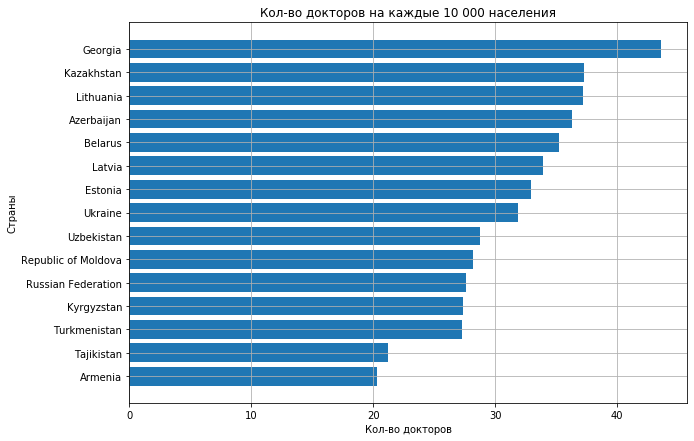

In [4]:
datas['md'] = get_stat('medicalDoctors',
                     ['country','period','indicator','result'])

plt.barh(datas['md']['country'], datas['md']['result'])
plt.title('Кол-во докторов на каждые 10 000 населения')
plt.xlabel('Кол-во докторов')
plt.ylabel('Страны')
plt.grid()

Как можно увидеть из таблицы выше, кол-во врачей прямо не коррелируются с продолжительностью жизни. Единственное совпадение это Туркменистан и Таджикистан с наименьшим кол-вом врачей на 10 тыс.чел. и с наименьшей продолжительностью жизни среди других стран.
<br>
<a id="7"></a>
2. Теперь посмотрим, как обстоит дело с медсестринским и акушерским персоналом на 10 000 населения.

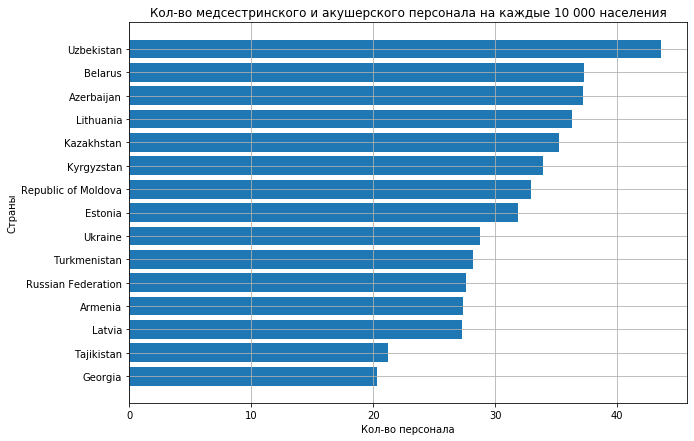

In [5]:
datas['nam'] = get_stat('nursingAndMidwife',
                     ['country','period','indicator','result'])

plt.barh(datas['nam']['country'], datas['md']['result'])
plt.title('Кол-во медсестринского и акушерского персонала на каждые 10 000 населения')
plt.xlabel('Кол-во персонала')
plt.ylabel('Страны')
plt.grid()

Здесь также нельзя провести прямую связь между продолжительностью жизни и кол-вом мед.персонала.
<br><br>
<a id="8"></a>
3. Теперь обратимся к статистике по обеспечению всеобщего охвата услугами здравоохранения 

In [29]:
datas['uc'] = get_stat('uhcCoverage',
                     ['country','indicator','period','result'],{},False)
datas['uc'].style.bar(color='#00cc00')

,country,result
0,Belarus,75.000000
1,Estonia,75.000000
2,Kazakhstan,75.000000
3,Russian Federation,73.000000
4,Uzbekistan,72.500000
5,Lithuania,71.500000
6,Turkmenistan,69.500000
7,Kyrgyzstan,69.000000
8,Latvia,69.000000
9,Republic of Moldova,68.500000


Здесь мы можем увидеть, что на одном из первых 3 мест находится только Эстония, а среди 3 последних находим Азербайджан. Остальные страны распределились достаточно равномерно по таблице. Единственное, что все же республики с более высокой продолжительностью жизни находятся в верхней половине таблицы, а с низкой в нижней. Только одно исключение это Армения. 
<br>
На основании этих данных мы можем предположить, что обеспечение всеобщего охвата услугами здравоохранения косвенно влияет на продолжительность жизни. 
<br><br>
Попробуем предположить, что на это влияют различные факторы в стране, такие как чистая питьевая вода, санитария и гигиена.
<br><br>
<a id="9"></a>
4. Посмотрим какой процент населения обеспечены питьевой водой

In [30]:
datas['bdws'] = get_stat('basicDrinkingWaterServices',
                     ['country','period','indicator','result'],{},False)

datas['bdws'].style.bar(color='#00cc00')

,country,result
0,Estonia,98.396667
1,Belarus,97.560000
2,Latvia,96.918333
3,Armenia,94.861667
4,Ukraine,94.003333
5,Georgia,91.293889
6,Turkmenistan,89.480000
7,Uzbekistan,89.396667
8,Russian Federation,88.534444
9,Lithuania,84.079444


На первых 3 местах видим Эстонию, Белоруссию, Литву и Армению. На последних Киргизию, Азербайджан и Таджикистан. Эта информация достаточно близка к показателям продолжительности жизни и соответственно на основании этих данных, мы можем предложить, что обеспечение питьевой водой может оказывать достаточное влияние на качество жизни населения. 
<br><br>
<a id="10"></a>
5. Теперь обратимся к чистым видам топлива и технологиям:

In [31]:
datas['cfat'] = get_stat('cleanFuelAndTech',
                     ['country','indicator','period','result'],{},False)
datas['cfat'].style.bar(color='#00cc00')

,country,result
0,Belarus,95.000000
1,Estonia,95.000000
2,Latvia,95.000000
3,Lithuania,95.000000
4,Turkmenistan,95.000000
5,Russian Federation,94.315789
6,Ukraine,94.000000
7,Armenia,92.105263
8,Kazakhstan,91.263158
9,Azerbaijan,88.578947


Здесь мы можем видеть, что 5 стран в начале выборки имеют одинаковый процент населения, которое полагается на чистые виды топлива и технологии - 95%. Если посмотреть данные по этим странам за все года в датасете, то у них также будет указано 95%. В данном случае мы предполагаем, что это шаблонные данные, которые без изменений добавляли в эту таблицу из года в год и поэтому мы не можем их использовать для дальнейших расчетов.

<a id="11"></a>
6. Рассмотрим какой процент населения имеет доступ к базовым санитарным услугам

In [32]:
datas['albss'] = get_stat('atLeastBasicSanitizationServices',
                     ['country','indicator','period','type','result'],
                     {'type':'Total'},False)
datas['albss'].style.bar(color='#00cc00')

,country,result
0,Estonia,99.420000
1,Kazakhstan,97.299444
2,Uzbekistan,97.266667
3,Ukraine,95.417778
4,Turkmenistan,95.248889
5,Kyrgyzstan,94.797778
6,Belarus,94.638333
7,Tajikistan,93.247222
8,Georgia,92.295556
9,Armenia,90.343333


Как можно увидеть, то население всех стран примерно в равной степени обеспечено базовыми санитарными услугами. В данной выборке мы видим 2-х аутсайдеров это Азербайджан и Молдавию. Такая разница в данных может говорить или о разнице подсчетов данного параметра в странах или о действительно более плохом положении с санитарными услугами. 
<br><br>
Обратимся к <a href="https://www.eea.europa.eu/ru/publications/vodnye-resursy-kachestvo-poverhnostnyh-vod/" target="_blank">докладу Европейской комиссии по окружающей среде</a> и вот, что мы там видим:
<br>
<i>"В 2017 году около 17 % сельского населения Молдовы (т.е. 7 % населения страны) не имели доступа к услугам водоснабжения, отвечающим требованиям безопасности, или услугам базового уровня. 31 % сельского населения имел ограниченный доступ к услугам водоотведения и канализации или доступ только к базовой санитарно-гигиенической инфраструктуре (WHO/UNICEF, 2019)."</i>
<br><br>
Мы можем предположить, что эти цифры верны.
<br><br>
Теперь рассмотрим насколько загрязнение окружающей среды влияет на уроверь смертности.

<a id="12"></a>
7. Рассмотрим уровень смертности от загрязнений атмосферного и домашнего воздуха на 100 000 человек
<br>
(возьмем полную статистику про оба пола)

In [10]:
datas['apdr'] = get_stat('airPollutionDeathRate',
                        ['country','type','indicator','period','gender','result'],                       
                        {'type':'Total', 'gender':'Both sexes',\
                         'indicator':'Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)'})
datas['apdr'].style.bar()

,country,result
0,Estonia,25.000000
1,Lithuania,33.960000
2,Latvia,41.350000
3,Russian Federation,49.380000
4,Armenia,54.840000
5,Belarus,60.740000
6,Kazakhstan,62.680000
7,Azerbaijan,63.950000
8,Ukraine,70.720000
9,Republic of Moldova,78.280000


Как можно увидеть по данной статистике, что первые 3 места по наименьшей смертности от загрязнения окружающей среды занимают прибалтийские страны, что может говорить о том, что чистая окружающей среда может напрямую влиять на продолжительность жизни.
<br><br>
<a id="13"></a>
8. Рассмотрим как обстоит дело с употреблением табака в рассматриваемых нами странах

In [11]:
datas['ta'] = get_stat('tobaccoAge15',
                     ['country','indicator','period','gender','result'],                       
                     {'gender':'Both sexes'})
datas['ta'].style.bar()

,country,result
0,Uzbekistan,13.466667
1,Azerbaijan,22.144444
2,Republic of Moldova,24.944444
3,Kazakhstan,27.188889
4,Kyrgyzstan,29.055556
5,Armenia,29.244444
6,Ukraine,29.555556
7,Belarus,29.911111
8,Lithuania,30.011111
9,Russian Federation,30.033333


Данная статистика приводится только по части нужных нам стран (13 из 15), поэтому попробуем сделать предположения исходя из той информации, что у нас есть. Как можно видеть из таблицы на первых местах по потреблению табака находятся Латвии, Эстония и Грузия, а на последних Узбекистан, Азербайджан и Молдавия. По этой информации мы не можем однозначно сказать насколько влияет потребление табака на продолжительность жизни, т.к. здесь видно противоречие между продолжительною жизни и кол-вом курящих людей.
<br><br>
<a id="14"></a>
9. Рассмотрим употребление алкоголя на душу населения

In [12]:
datas['asa'] = get_stat('AlcoholSubstanceAbuse',
                     ['country','period','indicator','gender','result'],                       
                     {'gender':'Both sexes'})
datas['asa'].style.bar()

,country,result
0,Tajikistan,2.854000
1,Azerbaijan,3.444000
2,Uzbekistan,3.604000
3,Turkmenistan,4.950000
4,Armenia,5.420000
5,Kazakhstan,6.380000
6,Georgia,7.666000
7,Kyrgyzstan,8.914000
8,Ukraine,11.304000
9,Latvia,11.552000


Здесь, как мы можем видеть, что употребление алкоголя не оказывает значительного влияние на продолжительность жизни. Страны с большим процентом потребления алкоголя на душу населения при этом имеют и не самую маленькую продолжительность жизни и наоборот страны, где очень мало употребляют алкоголь, являются аутсайдерами в средней продолжительности жизни. Из чего мы можем сделать предварительный вывод, что алкоголь влияния на продолжительность жизни в среднем по стране, но не такое значительное, как некоторые другие факторы. 
<br><br>
<a id="15"></a>
10. Обратим наше внимание на ситуацию с дорожно-транспортными происшествиями в исследуемых нами странах. Рассмотрим кол-во смертей в ДТП на 100 тыс. человек.

In [13]:
datas['rtd'] = get_stat('roadTrafficDeaths',
                     ['country','indicator','period','result'])
datas['rtd'].style.bar()

,country,result
0,Estonia,6.100000
1,Lithuania,8.000000
2,Azerbaijan,8.700000
3,Belarus,8.900000
4,Latvia,9.300000
5,Republic of Moldova,9.700000
6,Uzbekistan,11.500000
7,Ukraine,13.700000
8,Turkmenistan,14.500000
9,Georgia,15.300000


Здесь мы видим некоторую связь между странами с высокой продолжительности жизни и гибелью людей в ДТП. Прибалтийские страны в самой высокой продолжительностью жизни находятся в самом верху рейтинга, а аутсайдеры рейтинга продолжительности жизни распределены по указанной выше таблице. Антирейтинг возглавляет Таджикистан, Россия и Казахстан, но при этом Туркменистан и Азербайджан присутствуют в середине и почти в начале списка. Мы можем предположить, что ДТП на дорогах влияют на продолжительность жизни, но в таких странах как Туркменистан, Азербайджан и Узбекистан присутствуют дополнительны факторы влияющие на жизнь и здоровье людей. 
<br><br>
Теперь обратим наше внимание на данные по уровням репродуктивного здоровья населения стран:
<br>
<a id="16"></a>
11. Рассмотрим коэффициент подростковой рождаемости на 1000 женщин в возрасте 15-19 лет

In [33]:
datas['ab'] = get_stat('adolescentBirthRate',
                     ['country','period','indicator','result'], {}, False)
datas['ab'].style.bar(color='#00cc00')

,country,result
0,Tajikistan,45.750000
1,Azerbaijan,43.755556
2,Georgia,40.942105
3,Kyrgyzstan,33.755556
4,Kazakhstan,29.200000
5,Ukraine,28.382353
6,Republic of Moldova,28.016667
7,Russian Federation,27.000000
8,Armenia,25.900000
9,Turkmenistan,23.012500


Здесь можно увидеть, что в странах находящихся в европейской части меньше кол-во подростковой рождаемости. Это можно объяснить традициями данных стран. Например если взять <a href="https://lv.sputniknews.ru/infographics/20190418/11360511/vozrast-zhenschiny-rozhdenie-perventsa.html" target="_blank">статистику за 2017 год по среднему возрасту рождения первенца</a>, то мы можем увидеть, что средний возраст женщин, которые становятся матерями впервые, в Европе постоянно растет. 
<br><br>
<a id="17"></a>
12. Теперь рассмотрим вероятность смерти вероятность смерти детей в первые 28 дней жизни

In [15]:
datas['nmr'] = get_stat('neonatalMortalityRate',
                        ['country','period','indicator','gender','result'],                       
                        {'gender':'Both sexes'})
datas['nmr'].style.bar()

,country,result
0,Belarus,4.581935
1,Estonia,4.868437
2,Lithuania,5.228205
3,Latvia,6.329750
4,Russian Federation,7.024194
5,Ukraine,9.719722
6,Republic of Moldova,16.901842
7,Armenia,17.142326
8,Georgia,19.099535
9,Kazakhstan,19.530833


Здесь мы можем увидеть достаточно высокую детскую смертность у аутсайдеров нашего рейтинга и достаточно низкую у прибалтийских стран и Белоруссии. Примерно такой же результат мы можем получить, если рассмотрим данные из таблицы infantMortalityRate - смертность между рождением и 1 годом жизни ребенка на 1000 живорождений и under5MortalityRate - вероятность смерти детей в возрасте до 5 лет на 1000 живорождений. Из чего мы можем сделать вывод, что уровень перинатальной медицины и педиатрии в странах с наименьшей продолжительностью жизни находится на более худшем уровне, чем в странах с большей продолжительностью. 
<br><br>
Теперь рассмотрим уровень заболеваний в разных странах:
<br>
<a id="18"></a>
13. Начнем с вероятность смерти в возрасте от 30 до 70 лет от любого из сердечно-сосудистых заболеваний, рака, диабета или хронических респираторных заболеваний.

In [16]:
datas['cce'] = get_stat('30-70cancerChdEtc',
                        ['country','period','indicator','gender','result'],                       
                        {'gender':'Both sexes'})
datas['cce'].style.bar()

,country,result
0,Estonia,20.840000
1,Lithuania,23.320000
2,Georgia,24.500000
3,Armenia,25.100000
4,Latvia,25.240000
5,Azerbaijan,25.560000
6,Tajikistan,26.280000
7,Uzbekistan,27.000000
8,Kyrgyzstan,28.520000
9,Republic of Moldova,29.080000


Как можно видеть выше, то прибалтийские страны, а также Грузия и Армения показывают наименьший процент смертности от заболеваний. Также как и в предыдущем случае можем предположить, что уровень медицины в этих странах позволяет предотвращать смертность по этим заболеваниям.
<br><br>
<a id="19"></a>
14. Раззметрим кол-во заболеваний туберкулезом на 100 тыс. человек в год

In [18]:
datas['iot'] = get_stat('incedenceOfTuberculosis',
                        ['country','indicator','period','result'])
datas['iot'].style.bar()

,country,result
0,Estonia,32.150000
1,Armenia,57.700000
2,Latvia,58.050000
3,Belarus,60.400000
4,Lithuania,67.150000
5,Turkmenistan,76.450000
6,Russian Federation,78.800000
7,Azerbaijan,82.800000
8,Uzbekistan,95.950000
9,Ukraine,107.150000


Это достаточно важный показатель, которые может отображать ситуацию со здравоохранением в стране. <a href="https://www.who.int/ru/news-room/fact-sheets/detail/tuberculosis" target="_blank">Согласно докладу ВОЗ о Туберкулезе</a>:<br>
<i>"во всем мире туберкулез является одной из 10 основных причин смерти и основной причиной смерти (опережая ВИЧ/СПИД)... риску подвергаются все возрастные группы. Более 95% случаев заболевания и смерти происходят в развивающихся странах."</i> <br><br>
Эта информация как раз является достаточно хорошим показателем, что чем лучше уровень медицины в стране, тем меньше в ней болеющих туберкулезом людей.
<br><br>
<a id="20"></a>
15. В завершении просмотра аналитических данных сравним общий уровень самоубийств на 100 тыс. населения

In [19]:
datas['csr'] = get_stat('crudeSuicideRates',
                       ['country','period','indicator','gender','result'],                       
                       {'gender':'Both sexes'})
datas['csr'].style.bar()

,country,result
0,Tajikistan,2.180000
1,Azerbaijan,2.240000
2,Armenia,4.140000
3,Georgia,5.200000
4,Uzbekistan,5.360000
5,Turkmenistan,7.120000
6,Kyrgyzstan,8.620000
7,Republic of Moldova,14.660000
8,Estonia,17.220000
9,Latvia,21.140000


Данная информация не оказывает большого влияния на общий уровень жизни в стране, т.к. данные цифры представляют собой достаточно маленький процент от общего населения, но все же здесь мы можем видеть, в России, Литве и Белоруссии достаточно высокий уровень самоубийств. Если обратиться к <a href="https://lv.sputniknews.ru/analytics/20180124/7150560/Strana-samoubijc-bezrabotnyh-Zhiteli-Lithuania-svodjat-schety-zhiznju.html" target="_blank">докладу ВОЗ о профилактике психического здоровья</a>, то мы можем увидеть, что Литва сохраняет лидерство в Европе по суицидам с показателем 32,7 самоубийства на 100 тысяч граждан (в соседней Латвии — 21,7, в Эстонии — 18,9). Возможно, это связано с одним из самых высоких в мире, судя по исследованию ВОЗ, потреблением алкоголя на душу населения. Каждый литовец от пятнадцати лет и старше ежегодно выпивает 18,2 литра чистого алкоголя.
<br><br>
Теперь объединим все данные в один датафрейм для отображения матрици корреляции
<a id="21"></a>

In [20]:
# Таблицы и их сокращения
tables = {'leab':'lifeExpectancyAtBirth', 'md':'medicalDoctors', 'nam':'nursingAndMidwife',
'uc':'uhcCoverage', 'bdws':'basicDrinkingWaterServices', 'albss':'atLeastBasicSanitizationServices',\
'apdr':'airPollutionDeathRate', 'ta':'tobaccoAge15', 'asa':'AlcoholSubstanceAbuse',\
'rtd':'roadTrafficDeaths', 'ab':'adolescentBirthRate', 'nmr':'neonatalMortalityRate',\
'cce':'30-70cancerChdEtc', 'iot':'incedenceOfTuberculosis', 'csr':'crudeSuicideRates'}

result = pd.DataFrame({'name': resp})

i=1
for k,v in tables.items():
    temp = datas[k].sort_values(by='country', ascending=True).reset_index()
    result.insert(i, v, temp['result'].round(2))
    i=i+1

result

,name,lifeExpectancyAtBirth,medicalDoctors,nursingAndMidwife,uhcCoverage,basicDrinkingWaterServices,atLeastBasicSanitizationServices,airPollutionDeathRate,tobaccoAge15,AlcoholSubstanceAbuse,roadTrafficDeaths,adolescentBirthRate,neonatalMortalityRate,30-70cancerChdEtc,incedenceOfTuberculosis,crudeSuicideRates
0,Armenia,73.89,20.32,52.44,67.5,94.86,90.34,54.84,29.24,5.42,17.1,25.90,17.14,25.10,57.70,4.14
1,Azerbaijan,69.16,36.27,87.97,64.0,69.97,79.09,63.95,22.14,3.44,8.7,43.76,27.02,25.56,82.80,2.24
2,Belarus,71.97,35.24,94.36,75.0,97.56,94.64,60.74,29.91,14.27,8.9,21.62,4.58,29.58,60.40,30.54
3,Estonia,75.82,32.98,70.60,75.0,98.40,99.42,25.00,33.77,11.85,6.1,19.37,4.87,20.84,32.15,17.22
4,Georgia,71.78,43.55,42.52,66.0,91.29,92.30,101.80,31.12,7.67,15.3,40.94,19.10,24.50,145.30,5.20
5,Kazakhstan,69.36,37.31,79.35,75.0,81.86,97.30,62.68,27.19,6.38,17.6,29.20,19.53,33.28,136.60,26.20
6,Kyrgyzstan,70.22,27.39,76.10,69.0,77.52,94.80,110.70,29.06,8.91,15.4,33.76,21.29,28.52,134.40,8.62
7,Latvia,73.32,33.91,51.84,69.0,96.92,90.10,41.35,37.94,11.55,9.3,16.59,6.33,25.24,58.05,21.14
8,Lithuania,73.89,37.17,83.16,71.5,84.08,88.78,33.96,30.01,14.66,8.0,17.31,5.23,23.32,67.15,33.36
9,Republic of Moldova,70.02,28.17,73.45,68.5,78.45,75.23,78.28,24.94,14.54,9.7,28.02,16.90,29.08,113.25,14.66


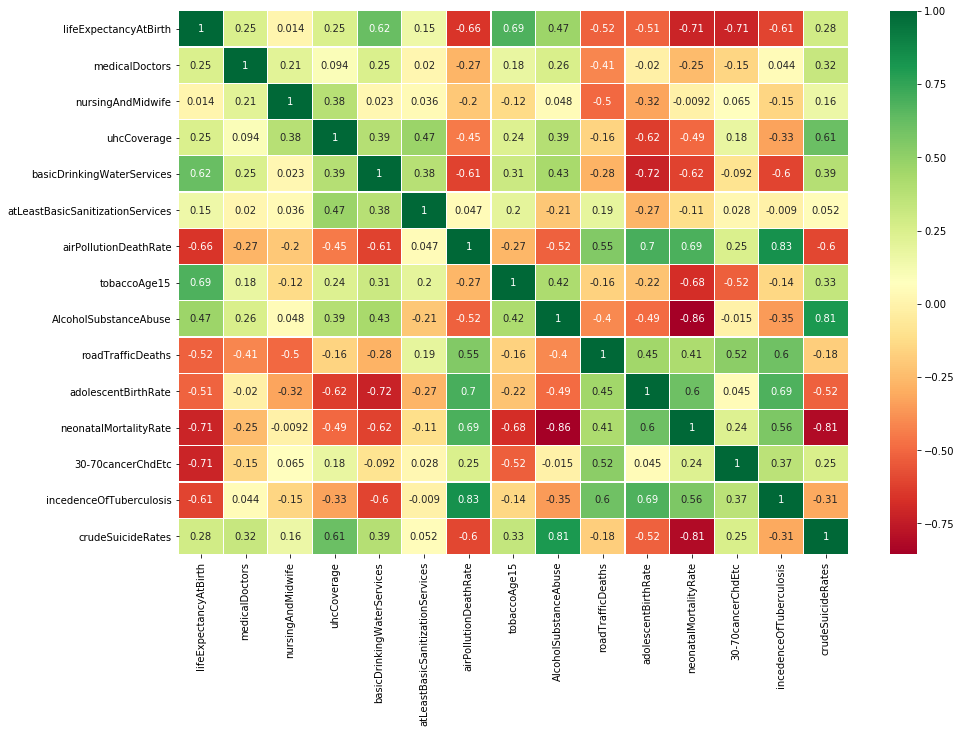

In [21]:
sns.heatmap(result.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Как мы можем видеть по визуализации матрицы корреляции, то параметры положительно влияющие на продолжительность жизни это:
<ul>
    <li>Качество питьевой воды</li>
    <li>Кол-во докторов</li>
    <li>Охват услугами здравоохранения</li>
    <li>Доступ к базовым санитарным услугам</li>
</ul>
Отрицательно влияющие на качество жизни: 
<ul>
    <li>Загрязнение окружающей среды</li>
    <li>Дорожно-транспортные происшествия</li>
    <li>Процент подростковой рождаемости</li>
    <li>Вероятность смерти детей в первые 28 дней жизни</li>
    <li>Вероятность смерти в возрасте от 30 до 70 лет от заболеваний</li>
    <li>Заболеваемость туберкулезом</li>
</ul>

Есть несколько параметров, которые были определены, как положительно влияющие:
<ul>
    <li>Курение</li>
    <li>Алкоголь</li>
    <li>Кол-во самоубийств</li>
</ul>
Скорее всего, здесь идет речь о том, что эти параметры не настолько значительно влияют на продолжительность жизни в стране, что может возникнуть ошибочное ощущение, что они являются положительными.

***
<a id="22"></a>
Чтобы оценить различия между выборками, которые вызывают у нас сомнения (курение, алкоголь и самоубийства), то выдвинем гипотезу, что данные выборки взаимосвязаны с продолжительностю жизни и для подтверждения этой гипотезы попробуем провести статистический тест. Чтобы выбрать критерий для проведения теста, построим графики распределения данных.

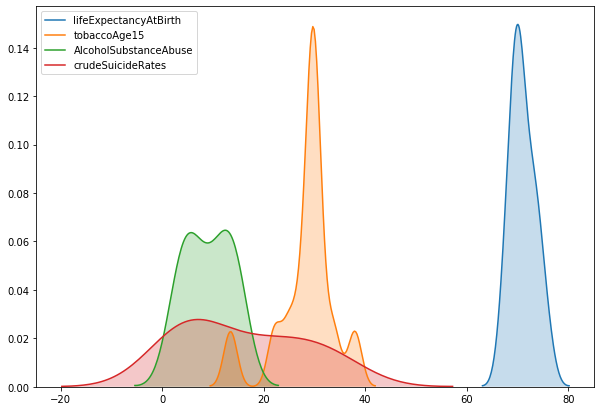

In [22]:
sns.kdeplot(result['lifeExpectancyAtBirth'], shade=True)
sns.kdeplot(result['tobaccoAge15'], shade=True)
sns.kdeplot(result['AlcoholSubstanceAbuse'], shade=True)
sns.kdeplot(result['crudeSuicideRates'], shade=True)

Не все графики данных показывают нормальное распределение. Выборки являются независимыми. Учитывая это и факт, что у нас небольшое кол-во значений в выборках, то попробуем провести статистический тест с помощью U-критерия или критерия Манна-Уитни, который также является непараметрическим. Числа в выборках мы упорядочим от наименьшего к наибольшему.

In [23]:
print(sts.mannwhitneyu(result['lifeExpectancyAtBirth'].sort_values(), result['tobaccoAge15'].sort_values()))
print(sts.mannwhitneyu(result['lifeExpectancyAtBirth'].sort_values(), result['AlcoholSubstanceAbuse'].sort_values()))
print(sts.mannwhitneyu(result['lifeExpectancyAtBirth'].sort_values(), result['crudeSuicideRates'].sort_values()))

MannwhitneyuResult(statistic=30.0, pvalue=0.0003349876372203655)
MannwhitneyuResult(statistic=0.0, pvalue=1.6916697063271153e-06)
MannwhitneyuResult(statistic=0.0, pvalue=1.6916697063271153e-06)


Как можно видеть выше, во всех 3-х случаях есть статистически значимая взаимосвязь между продолжительностью жизни и  другими выборками.
<br><br>
Статистические выборки не могут подсказать нам решение в данной ситуации, поэтому обратимся к информации ВОЗ (Всемирной Организации Здравоохранения), которая есть в открытых источниках.
<br><br>
Начнем с данных <a href="https://www.euro.who.int/ru/health-topics/disease-prevention/tobacco/data-and-statistics" target="_blank">ВОЗ о потреблении табака</a>:
<br>
<i>"В Европейском регионе ВОЗ по сравнению с другими странами мира доля смертей, связанных с употреблением табака (табакокурением и потреблением бездымных табачных изделий), является одной из самых высоких. По оценкам ВОЗ, на сегодняшний день в Регионе употребление табака является причиной 16% всех смертей среди взрослых старше 30 лет, причем большинство этих смертей являются преждевременными."
<br>
"Употребление табака среди подростков в Регионе возрастает, и в некоторых странах (например, в Латвии, Литве, Чешской Республике) уровень распространенности употребления табака среди подростков весьма схож с аналогичным показателем для взрослого населения."</i>
<br><br>
Это может нам говорить о том, что действительно в Прибалтийских странах курит большое кол-во населения, но по сравнению с другими странами, в них курит очень много подростков, которые обладают лучшим здоровьем, чем пожилые люди и поэтому они сильно влияют на показатели курильщиков, но пока не влияют на показатели смертности. Возможно это проявится в будущем, но в свою очередь ВОЗ ведет борьбу с курением и по их показателям среднее кол-во курильщиков в мире, хоть и медленно, но постоянно уменьшается.
<br><br>
Теперь приведем <a href="https://www.euro.who.int/ru/health-topics/disease-prevention/alcohol-use/data-and-statistics/q-and-a-how-can-i-drink-alcohol-safely" target="_blank">данные ВОЗ о потреблении алкоголя</a>:
<br>
<i>"Алкоголь употребляет лишь половина мирового населения. Европейский регион характеризуется при этом самым высоким уровнем потребления алкоголя и уровнем связанного с ним вреда. Алкоголь является в Регионе ведущей причиной нездоровья и преждевременной смертности."</i>
<br>
В данном случае мы можем предположить, что отрицательное влияние алкоголя в свою очередь могут компенсировать другие факторы, такие как медицина, санитария и экология. 
<br><br>
По поводу самоубийств можем предположить, как уже было сказано выше, что их количество не оказывает большого влияния на общий уровень жизни в стране, т.к. данные цифры представляют собой достаточно маленький процент от общего числа проживающих в стране.

<a id="23"></a>
### Выводы:
На основании нашего исследования мы можем сказать, что положительно на жизнь человека влияют:
<ul>
    <li>Качество питьевой воды</li>
    <li>Кол-во квалифицированных медицинских работников</li>
    <li>Охват услугами здравоохранения</li>
    <li>Доступ к базовым санитарным услугам</li>
</ul>
Отрицательно влияющие на качество жизни:
<ul>
    <li>Низкий уровень медицины в стране, что за собой влечет:</li>
    <ul>
        <li>Вероятность смерти детей в первые 28 дней жизни</li>
        <li>Вероятность смерти в возрасте от 30 до 70 лет от любого из сердечно-сосудистых заболеваний, рака, диабета или хронических респираторных заболеваний</li>
        <li>Заболеваемость туберкулезом</li>
    </ul>
    <li>Загрязнение окружающей среды</li>
    <li>Дорожно-транспортные происшествия</li>
</ul>
<br>
Как мы предположили в начале, медицина в Советском Союзе находилась приблизительно на одинаковом уровне во всех республиках, если ссылаться на высказывания экспертов. После развала СССР на отдельные сателиты, в каждой стране медицина, экология, санитария и другие сферы человеческой деятельности стали развиваться по своему. Все эти факторы стали влиять на среднюю продолжительность жизни населения.
<br><br>
В данном случае можно каждой из стран дать рекомендации по улучшению качества и продолжительности жизни населения:

**Армения:** Увеличить кол-во докторов и медицинского персонала в стране. Больше средств вкладывать в медицину, чтобы было охвачено большее кол-во населения возможностью пользоваться медицинскими услугами.
***
**Азербайджан:**  Требуется вкладывать больше средств в медицину, чтобы было охвачено большее кол-во населения возможностью пользоваться медицинскими услугами, т.к. при большом кол-ве рождающихся детей у женщин 15-19 лет, можно видеть большую детскую смертность, что может говорить, о том, что медицина находится на невысоком уровне. Важно сделать доступной питьевую воду для большего кол-ва населения в стране и улучшить доступность базовых санитарных услуг. 
***
**Белоруссия:** При достаточно хороших показателях жизни в стране, в ней наблюдается достаточно высокий уровень самоубийств. Здесь думаю нужно работать психологам и социальным службам, чтобы контролировать эту ситуацию. 
***
**Грузия:** Уменьшить уровень загрязнений атмосферного воздуха, бороться с употреблением табака и активно заниматься профилактикой заболеваемости туберкулезом. Также увеличить кол-во младшего медицинского персонала в стране.
***
**Казахстан:** Вкладываться в медицину, т.к. большой процент населения в возрасте от 30 до 70 лет умирает от любого из сердечно-сосудистых заболеваний, рака, диабета или хронических респираторных заболеваний. Также очень важна профилактика заболеваний туберкулезом и очень важно обратить внимание на большое кол-во смертей при ДТП.
***
**Киргизия:** Обеспечить больший процент населения питьевой водой уменьшить количество загрязнений атмосферного воздуха.
***
**Латвия:**  Увеличить кол-во младшего медицинского персонала в стране и заниматься профилактикой против курения, чтобы уменьшить кол-во курильщиков в стране.
***
**Литва:** Следить за суицидальными настроениями населения и заниматься профилактикой против алкоголизма.
***
**Молдавия:** Обеспечить доступ к питьевой воде и к базовым санитарным услугам для большего процента населения. Заниматься профилактикой против алкоголизма.
***
**Россия:** Обеспечить доступ к базовым санитарным услугам для большего процента населения. Заниматься профилактикой против алкоголизма. Развивать медицину, чтобы уменьшить кол-во смертей в возрасте от 30 до 70 лет от любого из сердечно-сосудистых заболеваний, рака, диабета или хронических респираторных заболеваний. Следить за суицидальными настроениями населения и очень важно обратить внимание на большое кол-во смертей при ДТП.
***
**Таджикистан:** Требуется вкладывать больше средств в медицину, чтобы было охвачено большее кол-во населения возможностью пользоваться медицинскими услугами, т.к. при большом кол-ве рождающихся детей у женщин 15-19 лет, можно видеть большую детскую смертность, что может говорить, о том, что медицина находится на невысоком уровне. Также в стране не хватает докторов и младшего медицинского персонала. Важно сделать доступной питьевую воду для большего кол-ва населения. Бороться с загрязнением атмосферного воздуха. Заниматься профилактикой туберкулеза и обратить внимание на большое кол-во ДТП в стране.
***
**Туркмения:** Требуется больше вкладываться в медицину и увеличивать кол-во докторов, т.к. наблюдается большая смертность, как среди новорожденных, так и среди взрослого населения.
***
**Украина:** Требуется вкладывать больше средств в медицину, чтобы было охвачено большее кол-во населения возможностью пользоваться медицинскими услугами, т.к. наблюдается высокий уровень смертности среди взрослого населения.
***
**Узбекистан:** Требуется вкладывать больше средств в медицину, особенно в повышение квалификации в сфере акушерства и педиатрию, т.к. при большом кол-ве специалистов наблюдается высокая смертность среди новорожденных. Также бороться с загрязнением атмосферного воздуха.
***
**Эстония:** Следить за суицидальными настроениями населения и пытаться уменьшить кол-во курильщиков в стране.